Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 04 in Python
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

#### Exercise 1: Pruning Decision Trees

__We will investigate the “diabetes.csv” dataset. Read the “description.txt” to understand the individual columns. Use the already imported libraries for this exercise (Note: You can install sklearn via pip as the `scikit-learn` package).__

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree

##### __(a) Load the dataset and use a sampling method to split the dataset into a training (80% rows) and test (20% rows) dataset. The target column is the last column.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [2]:
# Load the dataset
data_path = "data/diabetes.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Target"]
df = pd.read_csv(data_path, header=None, names=column_names)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### __(b) Use the training dataset to train a decision tree. Plot the tree.__ 

[Text(0.41390625, 0.9705882352941176, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.150625, 0.9117647058823529, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.055, 0.8529411764705882, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.03, 0.7941176470588235, 'X[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.02, 0.7352941176470589, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.01, 0.6764705882352942, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.03, 0.6764705882352942, 'X[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04, 0.6176470588235294, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.04, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08, 0.7941176470588235, 'X[2] <= 53.0\ngini = 0.287\nsamples = 92\nvalue = [76, 16]'),
 Text(0.0

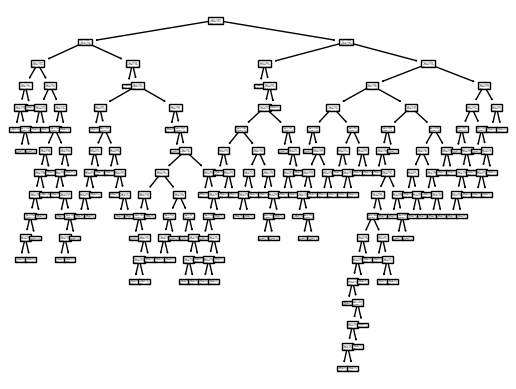

In [3]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

tree.plot_tree(dt)

##### __(c)	Measure the accuracy of the decision tree on the training and test dataset. The accuracy is one metric for evaluating classification models. `Accuracy = (number of correct predictions) / (total number of predictions)`.__
_(Hint: use the `DecisionTreeClassifier.score` method)_

In [4]:
train_accuracy = dt.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = dt.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.7662337662337663


##### __(d) Use prepruning and train a new decision tree. Use the `max_depth=7` parameter for the `DecisionTreeClassifier`. Plot the pruned decision tree.__

[Text(0.3861301369863014, 0.9375, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.15753424657534246, 0.8125, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.07534246575342465, 0.6875, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.0410958904109589, 0.5625, 'X[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.0273972602739726, 0.4375, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.0136986301369863, 0.3125, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.0410958904109589, 0.3125, 'X[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.0273972602739726, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0547945205479452, 0.1875, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.0547945205479452, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1095890410958904, 0.5625, 'X[2] <= 53.0\ngini = 0.287\nsamples = 92\nvalue = [76, 16]

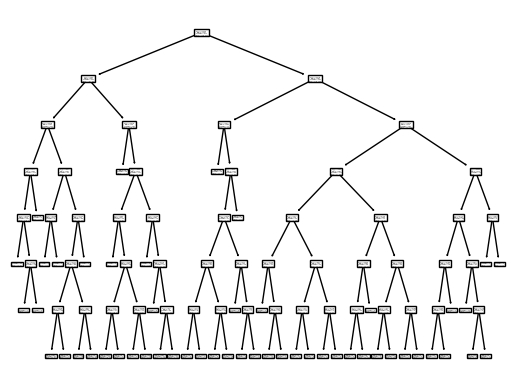

In [5]:
pruned_dt = tree.DecisionTreeClassifier(max_depth=7, random_state=0)
pruned_dt.fit(X_train, y_train)

tree.plot_tree(pruned_dt)

##### __(e) Measure the accuracy of the pruned decision tree on the training and test dataset.__ 

In [6]:
train_accuracy = pruned_dt.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = pruned_dt.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8859934853420195
Test Accuracy: 0.7922077922077922


##### __(f) Explain and discuss the results from c) and e).__

```
> The original decision tree achieved perfect accuracy on the training set (1.0). However, its performance on the test set was lower, which means it might have overfit the training data and doesn't generalize well to new, unseen data. The pruned decision tree avoids the perfect accuracy on the training set, resolving the overfitting issue observed in the original tree, and the pruned decision tree shows a higher test accuracy, which indicates that the pruning helped the model generalize better to new data. 
```

---

#### Exercise 2: Naïve Bayes Classification

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|No|
|2|US|US|No|No|Yes|
|3|EU|US|No|Yes|No|
|4|AS|EU|No|Yes|Yes|
|5|AS|AS|Yes|Yes|Yes|
|6|AS|AS|Yes|No|No|
|7|EU|AS|Yes|No|Yes|
|8|US|EU|No|Yes|No|
|9|US|AS|Yes|Yes|Yes|
|10|AS|EU|Yes|Yes|Yes|
|11|US|EU|Yes|No|Yes|
|12|EU|EU|No|No|Yes|
|13|EU|US|Yes|Yes|Yes|
|14|AS|EU|No|No|No|

* EU = Europe; US = United States; AS = Asia

##### __(a) According to the lecture slides, a Naïve Bayes Classifier assumes class conditional independence. Explain what this means and why that might be a problem.

```
> Conditional independence is when feature values are independent from each other, and therefore each value is assumed to be a standalone value. However, the prediction may not be as accurate.
```

##### __(b) For the given data above, calculate all conditional probabilities required by a Naïve Bayes Classifier by hand.__ 

![b](b.jpg)

##### __(c)	Calculate the posterior probabilities and classify the following three E-Mails by hand, using the probabilities calculated above.__ 
    a. E-mail A = (US, US, Yes, Yes)
    b. E-mail B = (Asia, Asia, No, No)
    c. E-mail C = (EU, Asia, No, Yes)


![c](c.jpg)

##### __(d) What problem do you encounter when classifying Email C and which technique could you use to overcome this problem? __ 

```
> We didn't encounter any problem during the calculation, but a zero probability(zero-frequency problem) might occur in similar cases. The way to resolve that is to add one to the count for every attribute value-class combination.
```

---

#### Exercise 3: Naïve Bayes Classification 

__In this exercise we will use the Naïve Bayes classification methods on a real data set. We will classify the digits dataset (see https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)__

<Figure size 640x480 with 0 Axes>

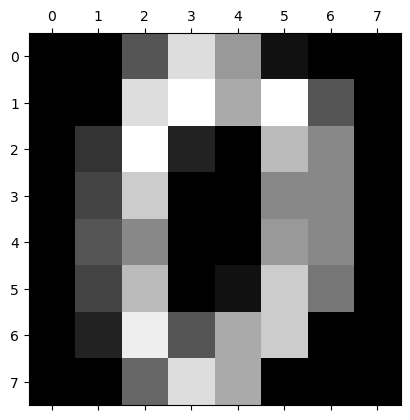

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

## example plot of one of the digits
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 

##### __(a) Split the dataset into a training (80% rows) and test (20% rows) data. The data column is `digits.data` and the target column `digits.target`.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

##### __(b) Generate a model and fit the dataset on the classifier.__ 
_(Hint: use already implemented version in `sklearn.naive_bayes.GaussianNB`)_

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

##### __(c) Compute the accuracy on the train and test data using the trained model.__ 
_(Hint: use already the `GaussianNB.predict` and `sklearn.metrics.accuracy_score` method for this)_

In [10]:
from sklearn.metrics import accuracy_score

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on the training set:", train_accuracy)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on the test set:", test_accuracy)

Accuracy on the training set: 0.8559498956158664
Accuracy on the test set: 0.825


***<span style="color:orange">Feedback: </span>***

- Overall looks great!
- 1 looks good
- I did not check every single number of 2, but the calculations and results look definitely correct
- 3 looks perfect

***<span style="color:green">Well done. Grade:green</span>***